In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsforecast.models import AutoARIMA
import pandas as pd
from cycler import cycler

/Users/jan/opt/miniconda3/envs/mfip-session5/lib/python3.9/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plt.rcParams["figure.figsize"] = (14, 6)
plt.style.use("seaborn-v0_8-whitegrid")

In [3]:
def plot_forecast(i, step, h, forecast):
    colors = list('bgrcmy')
    plt.plot(np.arange(i * step, i * step + h), forecast['mean'], '--', color=colors[i % len(colors)])
    plt.plot(np.arange(i * step, i * step + h), forecast['lo-95'], alpha=0.5, color=colors[i % len(colors)])
    plt.plot(np.arange(i * step, i * step + h), forecast['hi-95'], alpha=0.5, color=colors[i % len(colors)])

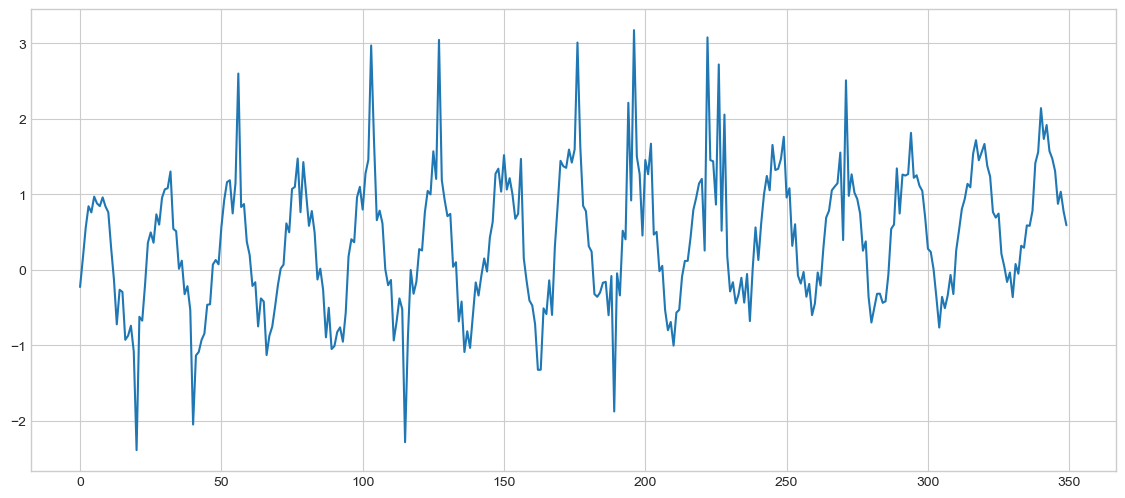

In [4]:
# Generate some simple synthetic data
xx = np.arange(350)
yy = 0.002*xx + np.sin(2*np.pi/24*xx) + 0.2*np.random.randn(350)
anom_idx = np.random.rand(350) < 0.2
yy[anom_idx] *= 3*np.random.rand(anom_idx.sum()) 
plt.plot(xx, yy)

In [5]:
df = pd.DataFrame(yy)

In [6]:
# df = pd.read_csv('time_series_sample.csv', index_col=0)

<AxesSubplot: >

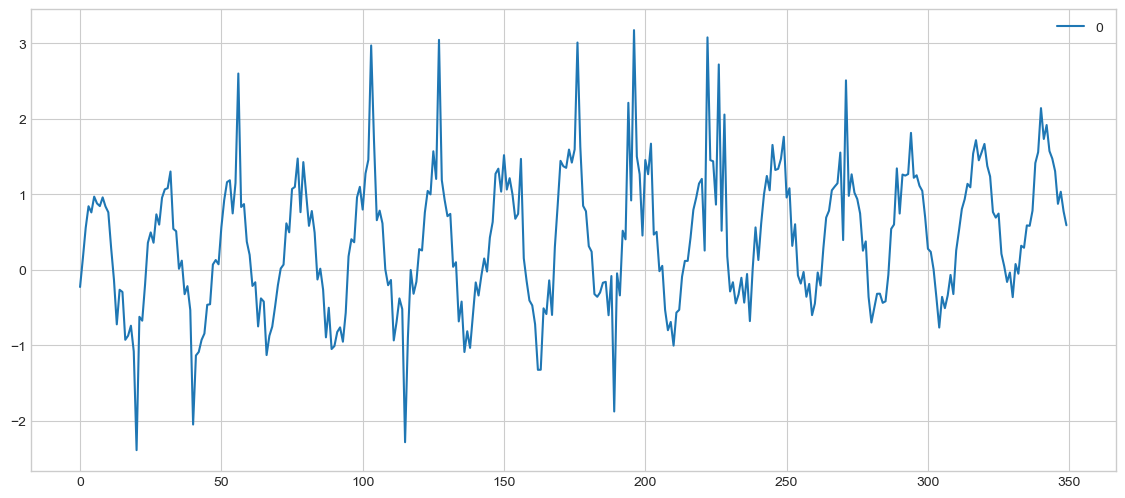

In [7]:
df.plot()

# Missing Values

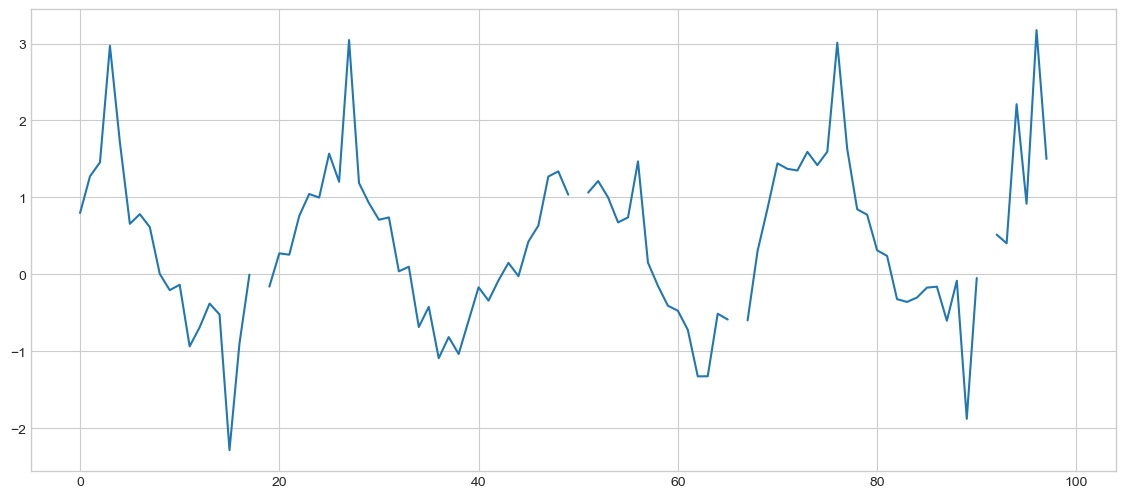

In [16]:
series_with_missing = df[100:200].copy().values.squeeze()
series_with_missing[np.random.rand(len(series_with_missing)) < 0.05] = np.nan
plt.plot(series_with_missing)

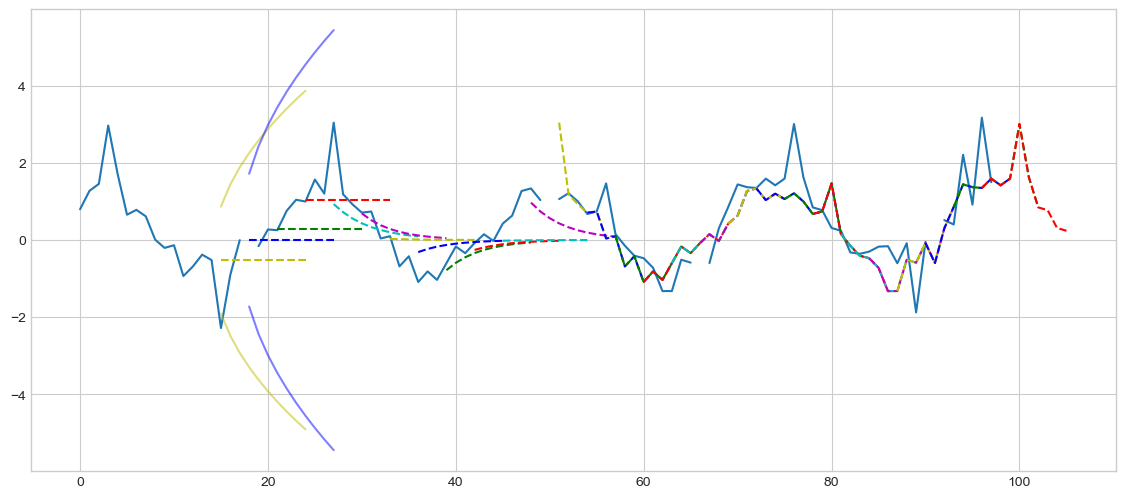

In [17]:
series = series_with_missing.copy()
step = 3
h = 10
plt.plot(series)
for i in range(5, len(series) // step):
    train_ts = series[:i * step]
    model = AutoARIMA(season_length=24)
    model.fit(train_ts)
    forecast = model.predict(h=h, level=(95,))
    plot_forecast(i, step, h, forecast)

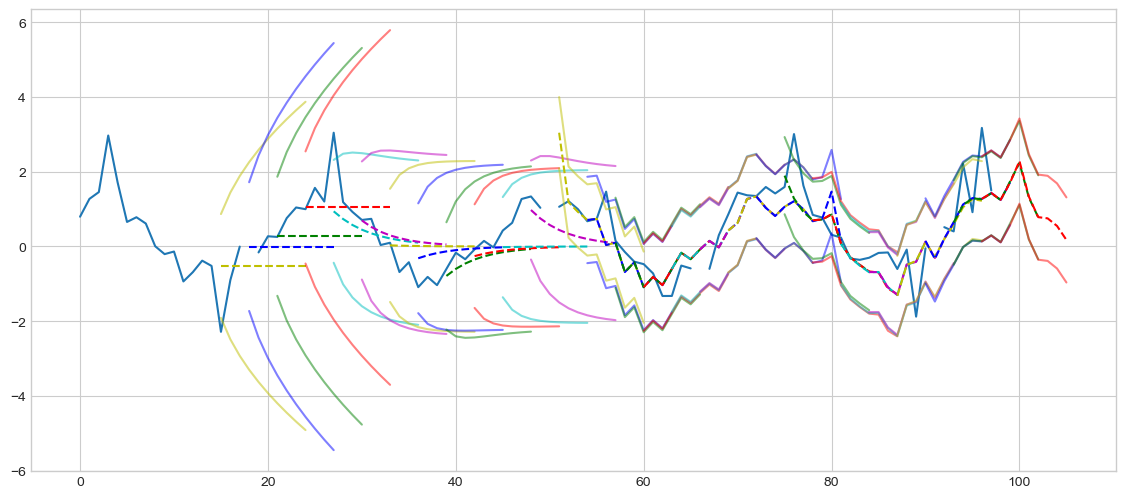

In [18]:
plt.plot(series)
previous_forecast = None
for i in range(5, len(series) // step):
    train_ts = series[:i * step]
    if previous_forecast is not None:
        mask = np.isnan(train_ts[-step:])
        sd = (previous_forecast['hi-95'][:step].values - previous_forecast['lo-95'][:step].values) / (2 * 1.96) 
        replacements = previous_forecast['mean'][:step] + sd*np.random.randn(step)
        train_ts[-step:][mask] = replacements[mask]
    model = AutoARIMA(season_length=24)
    model.fit(train_ts)
    forecast = model.predict(h=h, level=(95,))
    previous_forecast = forecast
    plot_forecast(i, step, h, forecast)

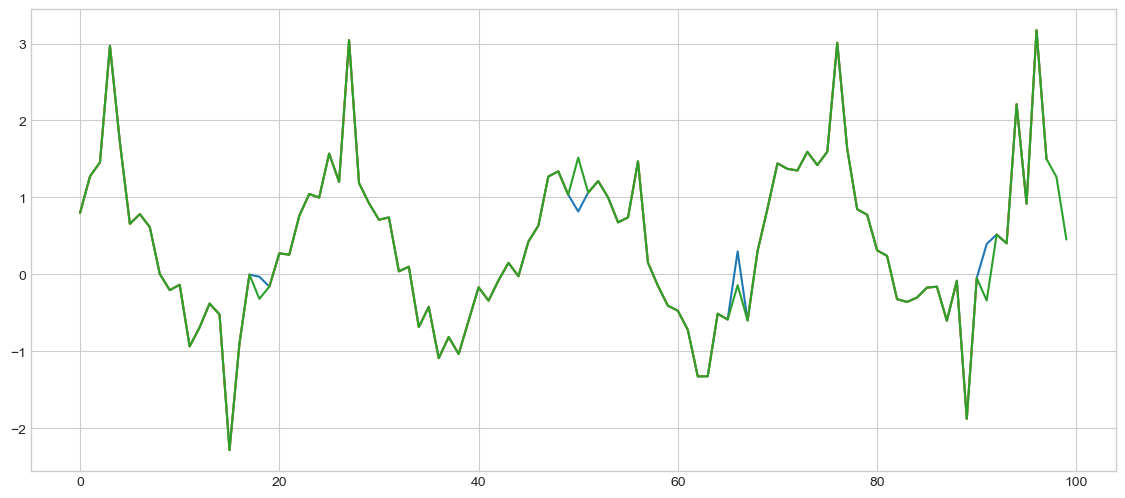

In [19]:
plt.plot(series)
plt.plot(series_with_missing)
plt.plot(df[100:200].values)

# Extreme Values

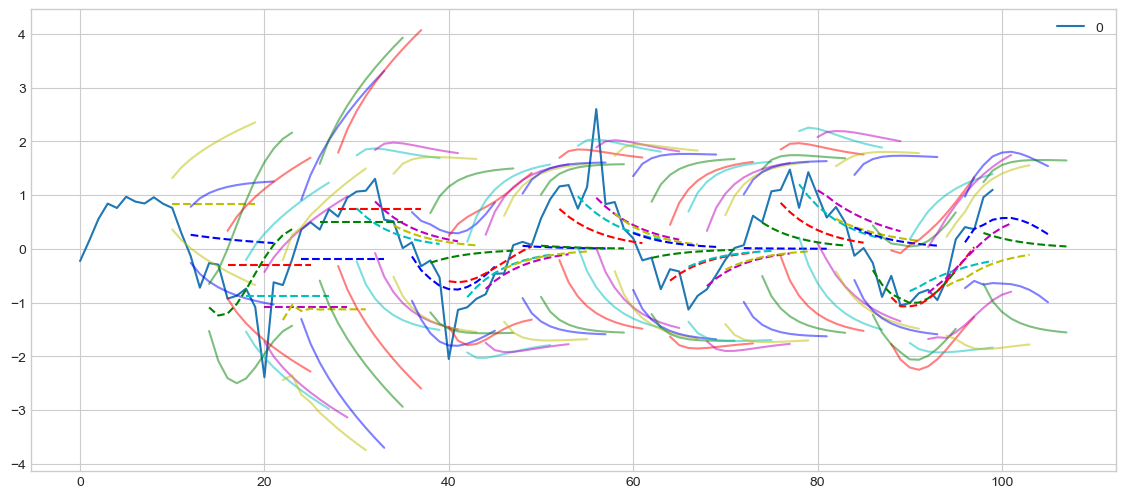

In [20]:
series = df[:100]
step = 2
h = 10
series.plot()
for i in range(5, len(series) // step):
    train_ts = series[:i * step].values.squeeze()
    model = AutoARIMA()
    model.fit(train_ts)
    forecast = model.predict(h=h, level=(95,))
    plot_forecast(i, step, h, forecast)

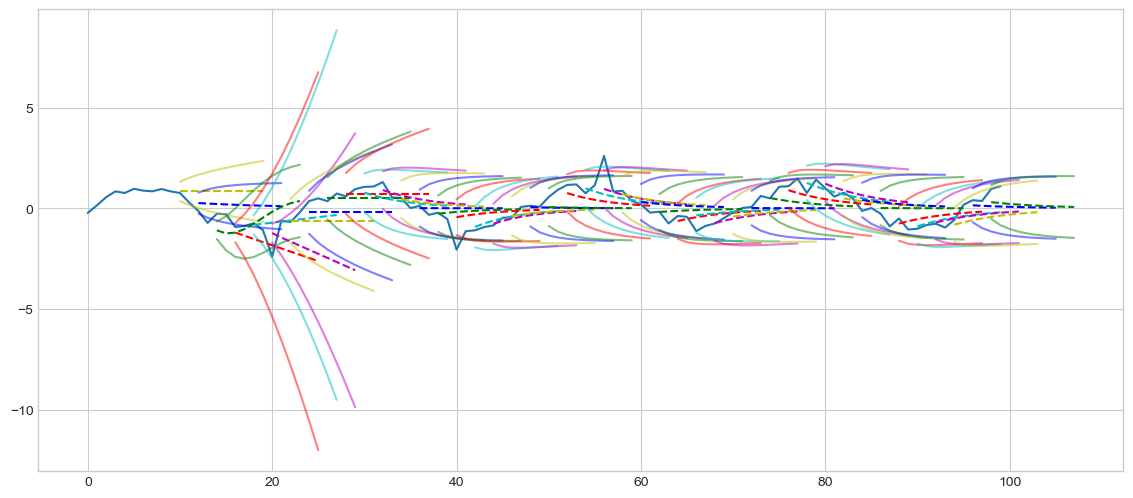

In [21]:
series = df[:100].values.copy().squeeze()
step = 2
h = 10
colors = list('bgrcmy')
plt.plot(series)
previous_forecast = None
for i in range(5, len(series) // step):
    train_ts = series[:i * step]
    if previous_forecast is not None:
        mask = train_ts[-step:] > previous_forecast['hi-95'][:step].values
        sd = (previous_forecast['hi-95'][:step].values - previous_forecast['lo-95'][:step].values) / (2 * 1.96) 
        replacements = previous_forecast['mean'][:step] + sd*np.random.randn(step)
        train_ts[-step:][mask] = replacements[mask]
    model = AutoARIMA()
    model.fit(train_ts)
    forecast = model.predict(h=h, level=(95,))
    previous_forecast = forecast
    plot_forecast(i, step, h, forecast)

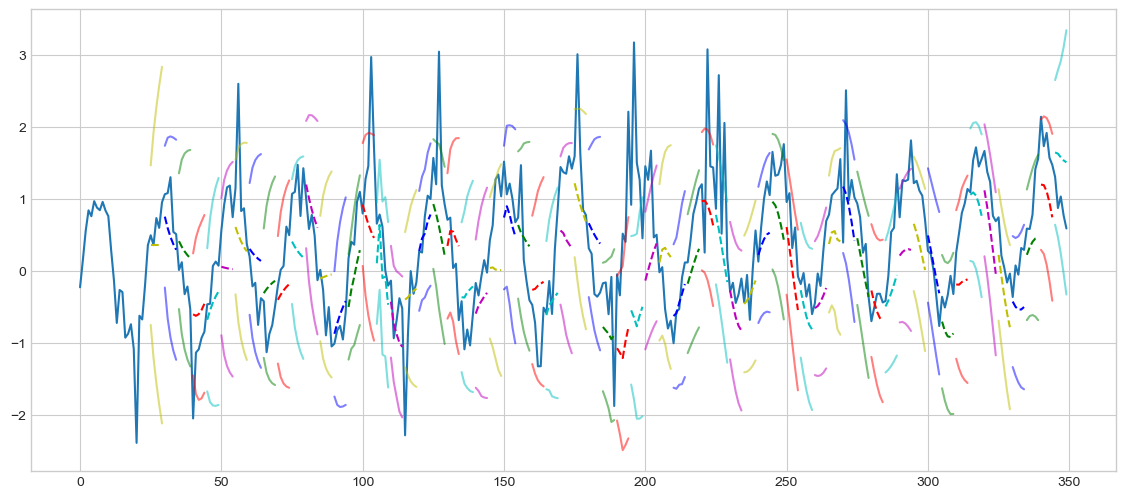

In [22]:
series = df.values.copy().squeeze()
step = 5
h = 5
colors = list('bgrcmy')
plt.plot(series)
previous_forecast = None
for i in range(5, len(series) // step):
    train_ts = series[:i * step]
    if previous_forecast is not None:
        mask = train_ts[-step:] > previous_forecast['hi-95'][:step].values
        sd = (previous_forecast['hi-95'][:step].values - previous_forecast['lo-95'][:step].values) / (2 * 1.96) 
        replacements = previous_forecast['mean'][:step] + sd*np.random.randn(step)
        train_ts[-step:][mask] = replacements[mask]
    model = AutoARIMA()
    model.fit(train_ts)
    forecast = model.predict(h=h, level=(95,))
    previous_forecast = forecast
    plot_forecast(i, step, h, forecast)

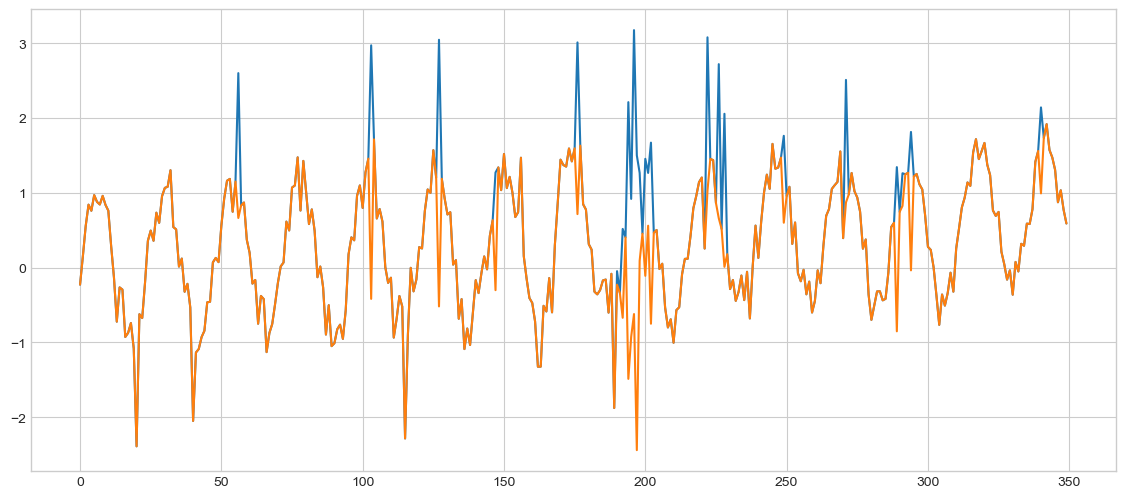

In [23]:
plt.plot(df.values)
plt.plot(series)